In [51]:
import torch
import random
import os, shutil, glob
import numpy as np
import types
import torchvision
import pickle
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from pathlib import Path
torch.__version__

'2.2.1+cu121'

### Create the directories and save the paths to ones we need later

In [52]:
ai_art_data_dir = '../../datasets/AiArtData'
real_art_dir = '../../datasets/RealArt'

new_art_dir = '../../datasets/art'
new_train_dir = '../../datasets/art/train'
new_test_dir = '../../datasets/art/test'
new_val_dir = '../../datasets/art/validation'

new_ai_train_dir = '../../datasets/art/train/ai-generated'
new_real_train_dir = '../../datasets/art/train/web-scraping'
new_ai_test_dir = '../../datasets/art/test/ai-generated'
new_real_test_dir = '../../datasets/art/test/web-scraping'
new_ai_val_dir = '../../datasets/art/validation/ai-generated'
new_real_val_dir = '../../datasets/art/validation/web-scraping'

new_dirs = [new_art_dir,new_train_dir, new_test_dir, new_val_dir, new_ai_train_dir, new_real_train_dir, new_ai_test_dir, new_real_test_dir, new_ai_val_dir, new_real_val_dir]

### Remove Garbage Files

In [53]:
def remove_zone_identifier_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('Identifier'):
                full_path = os.path.join(root, file)
                os.remove(full_path)
                print(f"Removed: {full_path}")

### Transform files to PNG

In [54]:
def transform_to_png(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            if file.endswith('.jpg') or file.endswith('.jpeg'):
                im = Image.open(file_path)
                new_filename = file.rsplit('.', 1)[0] + '.png'
                dst_path = os.path.join(root, new_filename)
                im.save(dst_path, 'PNG')
                print(f'Converted {file} to {new_filename}')
                os.remove(file_path)
                print(f'Removed original file: {file}')
            elif '.' not in file:
                os.remove(file_path)
                print(f'Removed file with no extension: {file}')


### Create New Directories

In [55]:
def create_directories(dirs: list):
    for d in dirs:
        print(d)
        if not os.path.exists(d):
            os.mkdir(d)


### Transfer Files

In [58]:
ai_art_files = os.listdir('../../datasets/AiArtData')
real_art_files = os.listdir('../../datasets/RealArt')

ai_art_train_count = int(0.7 * len(ai_art_files))
real_art_train_count = int(0.7 * len(real_art_files))

ai_art_test_count = int(0.2 * len(ai_art_files))
real_art_test_count = int(0.2 * len(real_art_files))

aiart_val_count = int(0.1 * len(ai_art_files))
real_art_val_count = int(0.1 * len(real_art_files))

ai_train_files = ai_art_files[:ai_art_train_count]
real_train_files = real_art_files[:real_art_train_count]

ai_test_files = ai_art_files[ai_art_train_count:ai_art_train_count + ai_art_test_count]
real_test_files = real_art_files[real_art_train_count:real_art_train_count + real_art_test_count]

ai_val_files = ai_art_files[ai_art_train_count + ai_art_test_count:]
real_val_files = real_art_files[real_art_train_count + real_art_test_count:]

ai_dir_tuple_list = [(ai_art_data_dir, new_ai_train_dir, ai_train_files), (ai_art_data_dir, new_ai_test_dir, ai_test_files), (ai_art_data_dir, new_ai_val_dir, ai_val_files)]
real_dir_tuple_list = [(real_art_dir, new_real_train_dir, real_train_files), (real_art_dir, new_real_test_dir, real_test_files), (real_art_dir, new_real_val_dir, real_val_files)]

def transfer_files(dir_tuple_list: list):
    for src, dst, files in dir_tuple_list:
        for file in files:
            shutil.copy(os.path.join(src, file), os.path.join(dst, file))
            print(f'Copied {file} to {dst}')



In [59]:
remove_zone_identifier_files(ai_art_data_dir)
remove_zone_identifier_files(real_art_dir)
transform_to_png(ai_art_data_dir)
transform_to_png(real_art_dir)
create_directories(new_dirs)
ai_art_files = os.listdir('../../datasets/AiArtData')
real_art_files = os.listdir('../../datasets/RealArt')
transfer_files(ai_dir_tuple_list)
transfer_files(real_dir_tuple_list)

../../datasets/art
../../datasets/art/train
../../datasets/art/test
../../datasets/art/validation
../../datasets/art/train/ai-generated
../../datasets/art/train/web-scraping
../../datasets/art/test/ai-generated
../../datasets/art/test/web-scraping
../../datasets/art/validation/ai-generated
../../datasets/art/validation/web-scraping
Copied landscape-art-ai-generated-photo.png to ../../datasets/art/train/ai-generated
Copied elizabeth-rev.png to ../../datasets/art/train/ai-generated
Copied Turn-a-selfie-into-AI-portraits-in-different-styles-instantly-with-Fotor-AI-portrait-generator.png to ../../datasets/art/train/ai-generated
Copied 24jo7tag_a-delhi-and-mumbai-woman-depicted-in-the-aigenerated-artwork_625x300_29_December_22.png to ../../datasets/art/train/ai-generated
Copied 0qL4hrXp-V_NW-FR-.png to ../../datasets/art/train/ai-generated
Copied 1If0feu29zDCd9QIWw-vG9Q.png to ../../datasets/art/train/ai-generated
Copied ai-generated-7483596_1280.png to ../../datasets/art/train/ai-generated

In [60]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [61]:
!nvidia-smi

Mon May  6 18:40:29 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.60.01              Driver Version: 551.76         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3080 Ti     On  |   00000000:01:00.0  On |                  N/A |
| 50%   46C    P8             38W /  400W |    2582MiB /  12288MiB |     48%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [62]:
def walk_through_dir(dir_path):
    for dirpath, dirnames, filesnames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filesnames)} images in '{dirpath}'")

walk_through_dir('../../datasets/art')

There are 3 directories and 0 images in '../../datasets/art'
There are 2 directories and 0 images in '../../datasets/art/train'
There are 0 directories and 375 images in '../../datasets/art/train/ai-generated'
There are 0 directories and 304 images in '../../datasets/art/train/web-scraping'
There are 2 directories and 0 images in '../../datasets/art/test'
There are 0 directories and 107 images in '../../datasets/art/test/ai-generated'
There are 0 directories and 87 images in '../../datasets/art/test/web-scraping'
There are 2 directories and 0 images in '../../datasets/art/validation'
There are 0 directories and 55 images in '../../datasets/art/validation/ai-generated'
There are 0 directories and 44 images in '../../datasets/art/validation/web-scraping'


### Examine the Data

In [63]:
image_dir = Path('../../datasets/art')
train_dir = Path('../../datasets/art/train')
test_dir = Path('../../datasets/art/test')
val_dir = Path('../../datasets/art/validation')

Random AI art image path: ../../datasets/art/test/ai-generated/earing-a-yellow-kimono-in-a-beautiful-and-foggy-tropical-greenh-copy-800x800.png
Random AI art image class: ai-generated
Random AI art image height: 800
Random AI art image width: 800


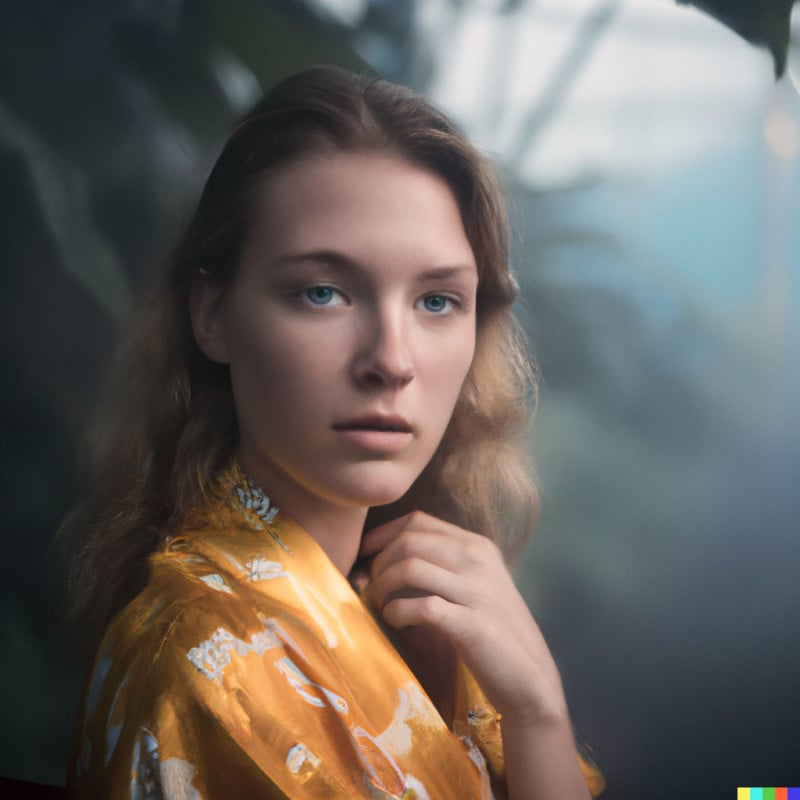

In [64]:
image_path_list = list(image_dir.glob('*/*/*png'))
rand_image_path = random.choice(image_path_list)
image_class = rand_image_path.parent.stem
img = Image.open(rand_image_path)
print(f"Random AI art image path: {rand_image_path}")
print(f"Random AI art image class: {image_class}")
print(f"Random AI art image height: {img.height}")
print(f"Random AI art image width: {img.width}")
img


(-0.5, 799.5, 799.5, -0.5)

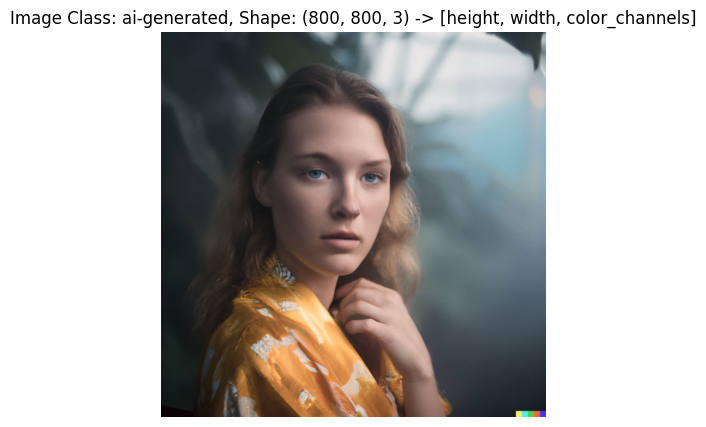

In [65]:
img_as_array = np.array(img)
plt.figure(figsize=(5,5))
plt.imshow(img_as_array)
plt.title(f"Image Class: {image_class}, Shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

In [66]:
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [67]:
data_transform(img).shape

torch.Size([3, 224, 224])

In [68]:
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform, target_transform=None)
val_data = datasets.ImageFolder(root=val_dir, transform=data_transform, target_transform=None)

train_data, test_data, val_data

(Dataset ImageFolder
     Number of datapoints: 679
     Root location: ../../datasets/art/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 193
     Root location: ../../datasets/art/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 99
     Root location: ../../datasets/art/validation
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [69]:
classes = train_data.classes
classes

['ai-generated', 'web-scraping']

In [70]:
len(train_data), len(test_data), len(val_data)

(679, 193, 99)

In [71]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: list[str] = None,
                          n: int = 10,
                          display_shape: bool = True):
    random_samples_idx = random.sample(range(len(dataset)), k=n)
    plt.figure(figsize=(20, 20))
    for i, targ_sample in enumerate(random_samples_idx):
        img, label = dataset[targ_sample]
        img = img.permute(1, 2, 0)
        plt.subplot(5, 5, i+1)
        plt.imshow(img)
        if classes:
            title = f"{classes[label]}"
        if display_shape:
            plt.xlabel(img.shape)
        plt.axis(False)
        plt.title(title)

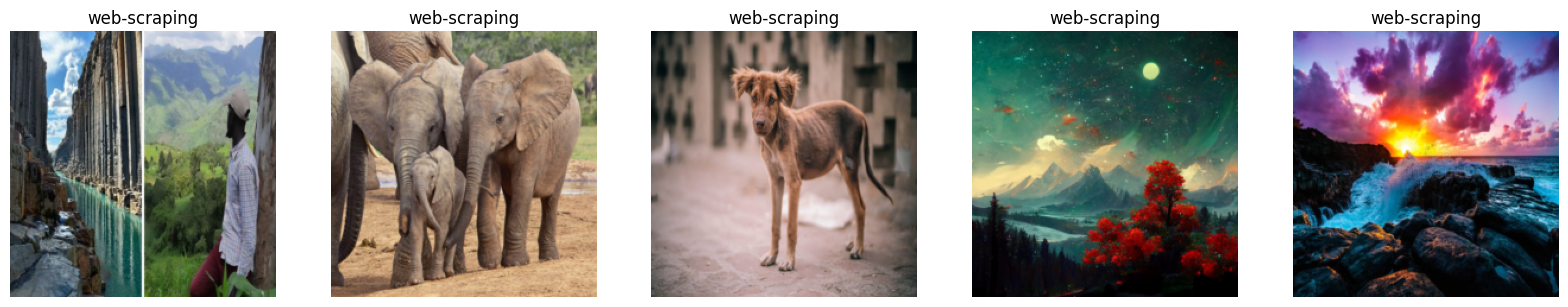

In [72]:
display_random_images(train_data, train_data.classes, 5)

In [73]:
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_data_loader = DataLoader(train_data, 
                               batch_size=BATCH_SIZE, 
                               shuffle=True, 
                               num_workers=NUM_WORKERS, 
                               pin_memory=True, 
                               drop_last=True,
                               prefetch_factor=2, 
                               persistent_workers=True, 
                               timeout=0)

test_data_loader = DataLoader(test_data, 
                               batch_size=BATCH_SIZE, 
                               shuffle=False, 
                               num_workers=NUM_WORKERS, 
                               pin_memory=True, 
                               drop_last=True,
                               prefetch_factor=2, 
                               persistent_workers=True, 
                               timeout=0) 

val_data_loader = DataLoader(val_data, 
                               batch_size=BATCH_SIZE, 
                               shuffle=False, 
                               num_workers=NUM_WORKERS, 
                               pin_memory=True, 
                               drop_last=True,
                               prefetch_factor=2, 
                               persistent_workers=True, 
                               timeout=0) 

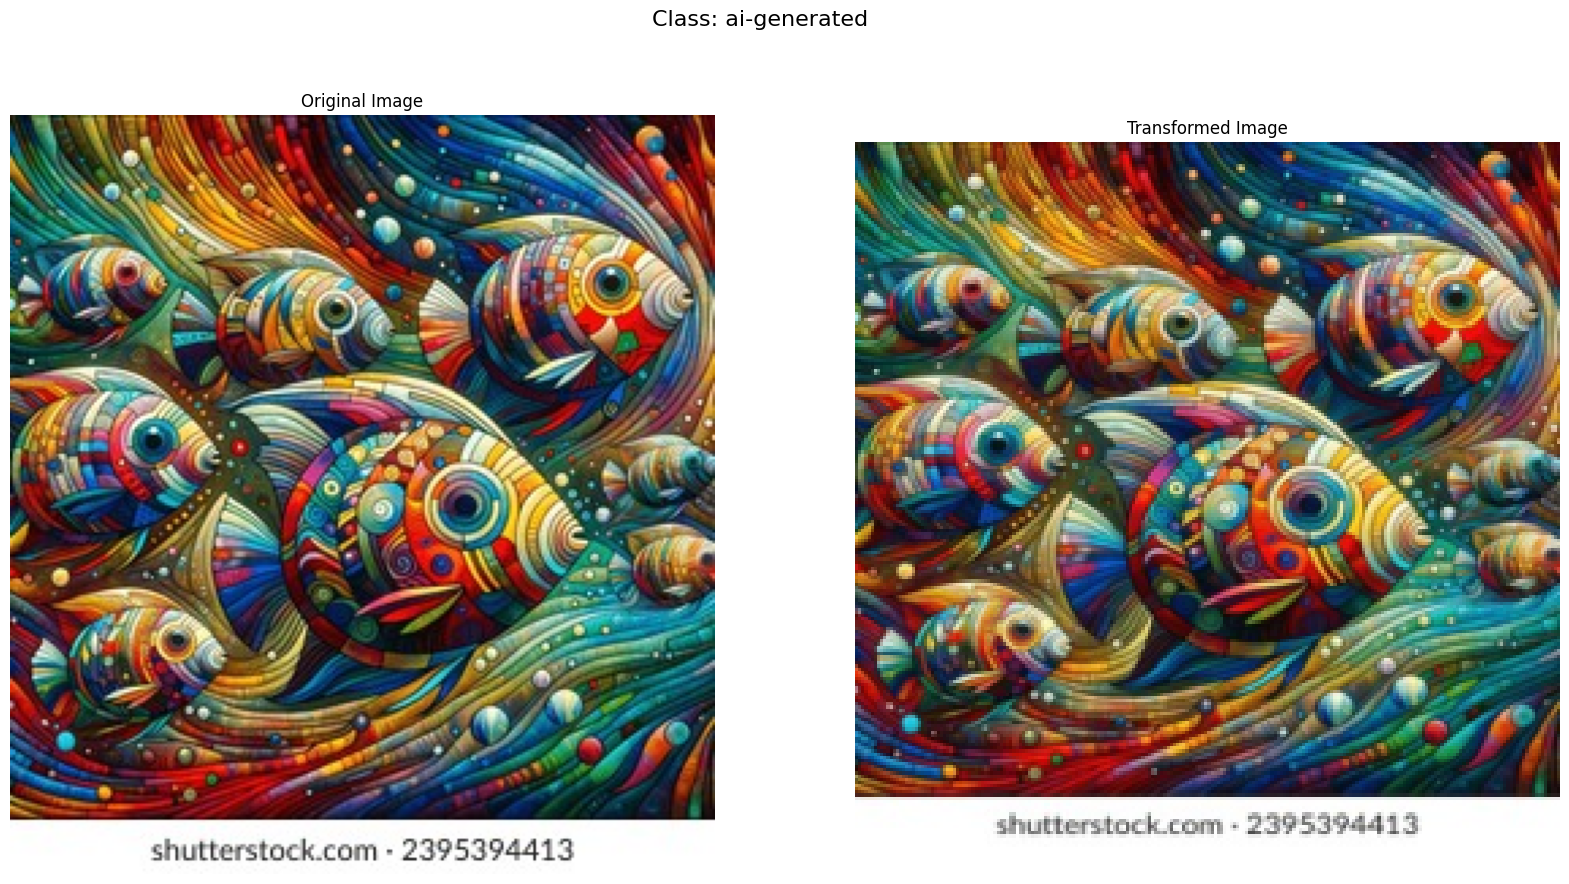

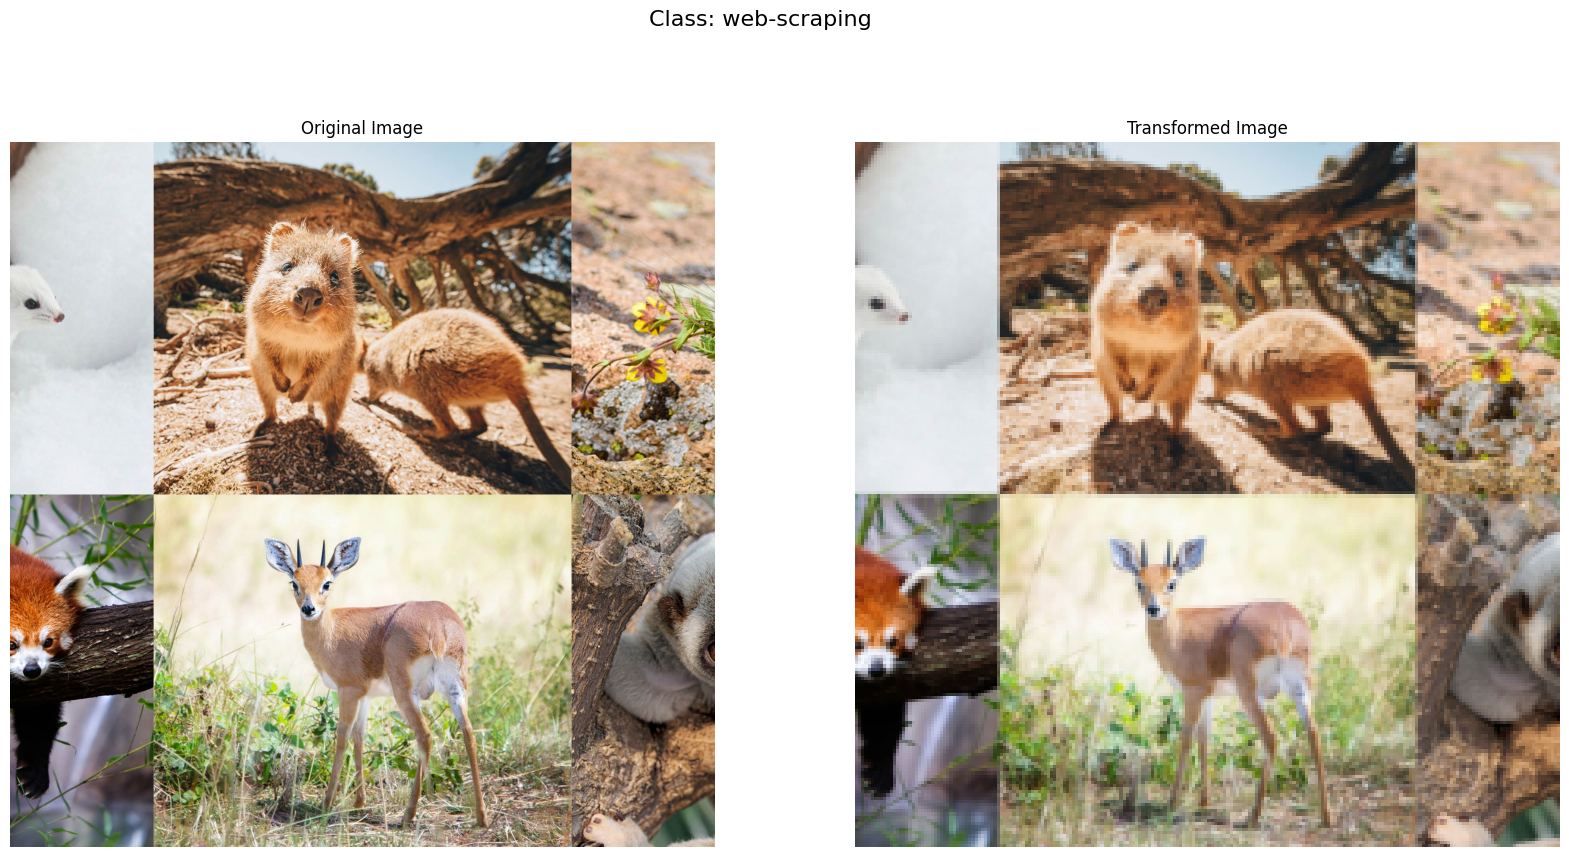

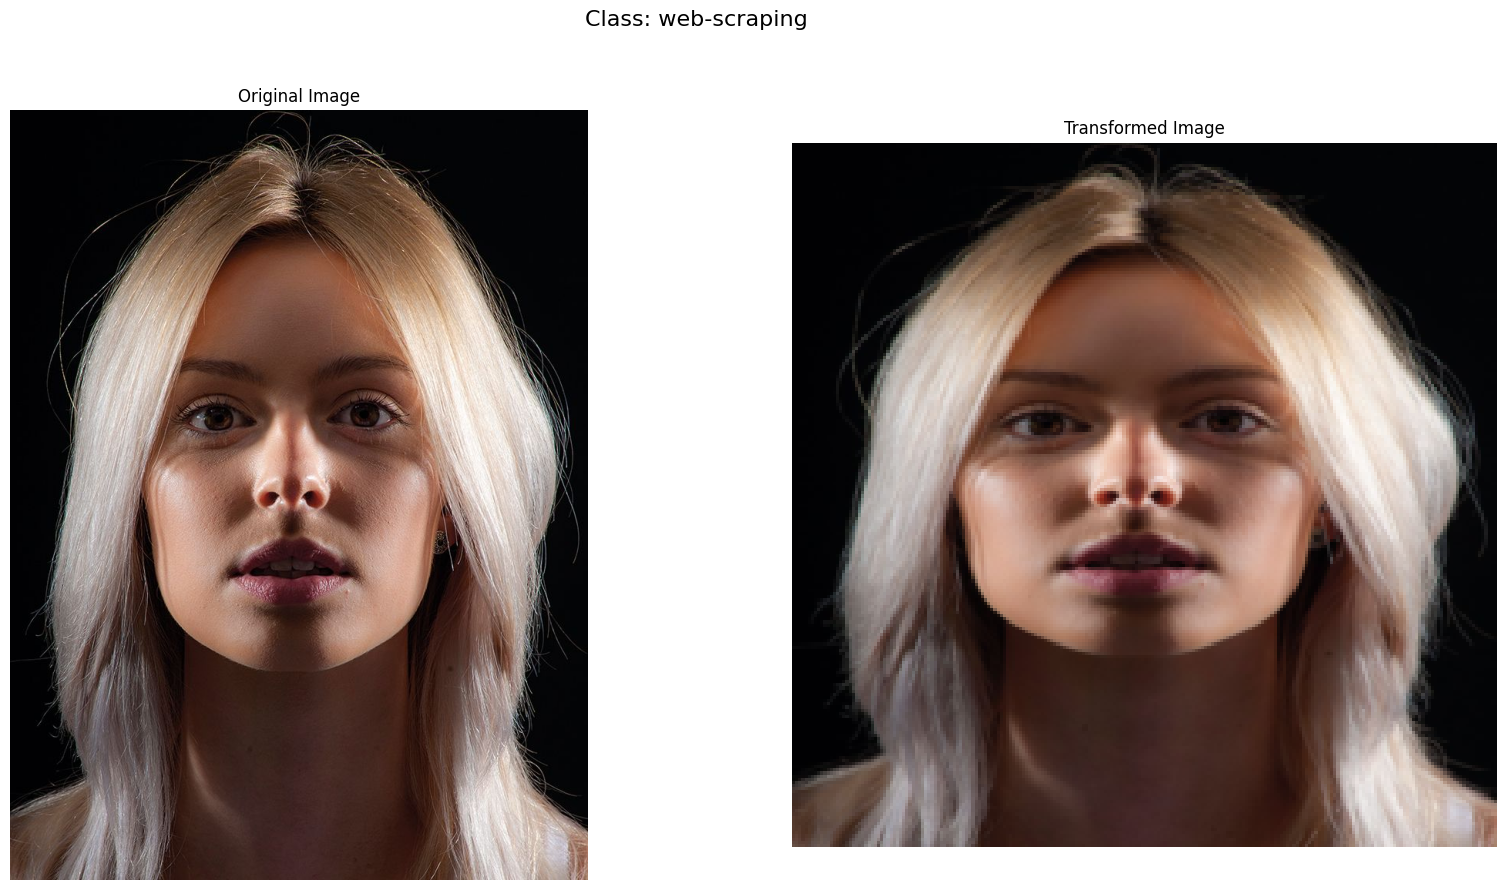

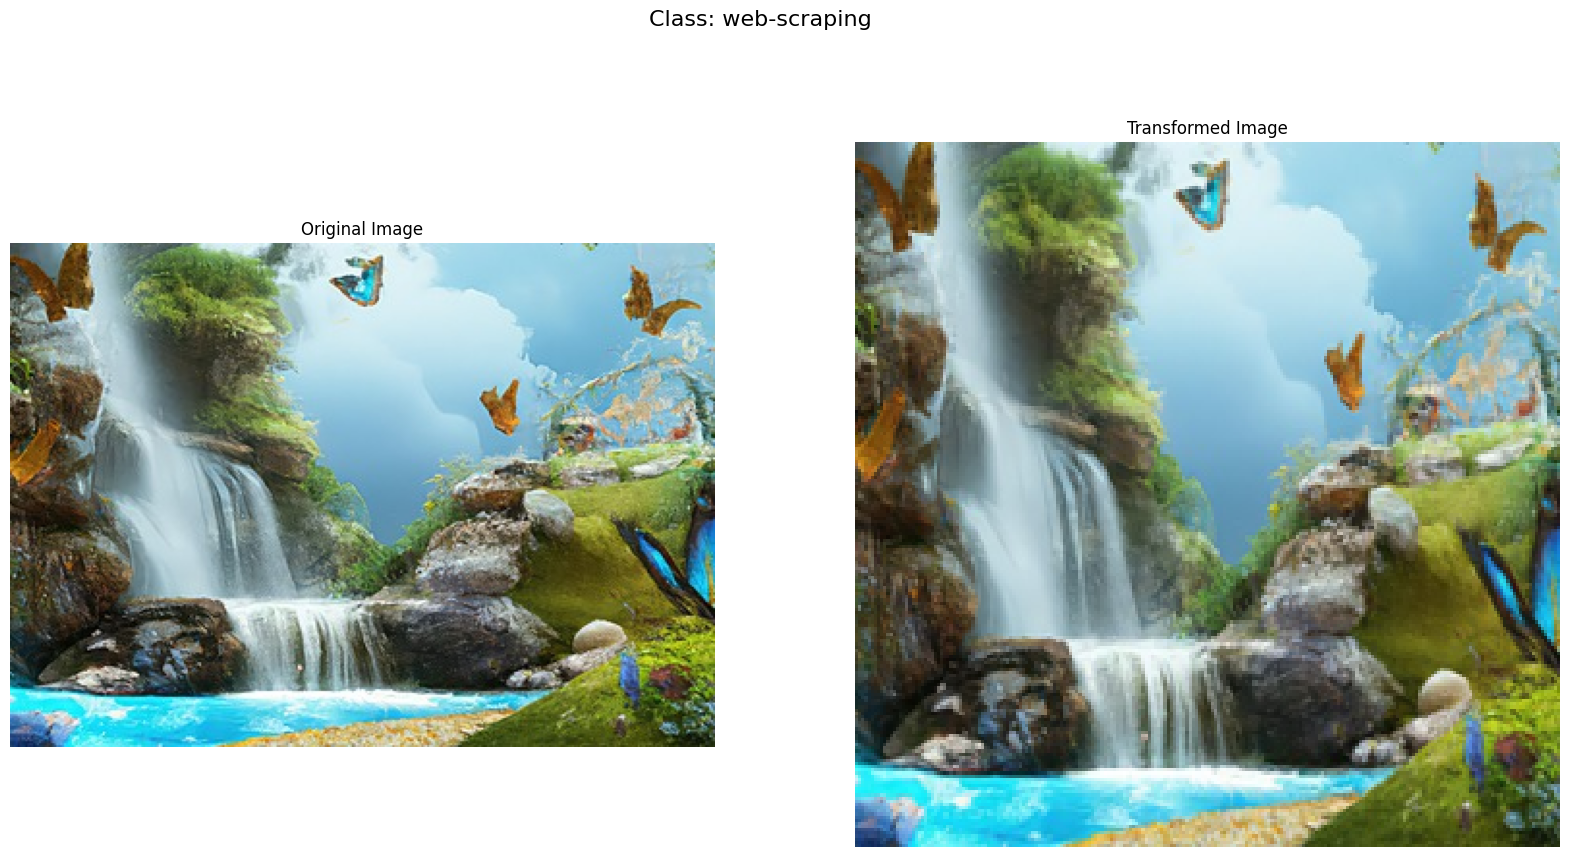

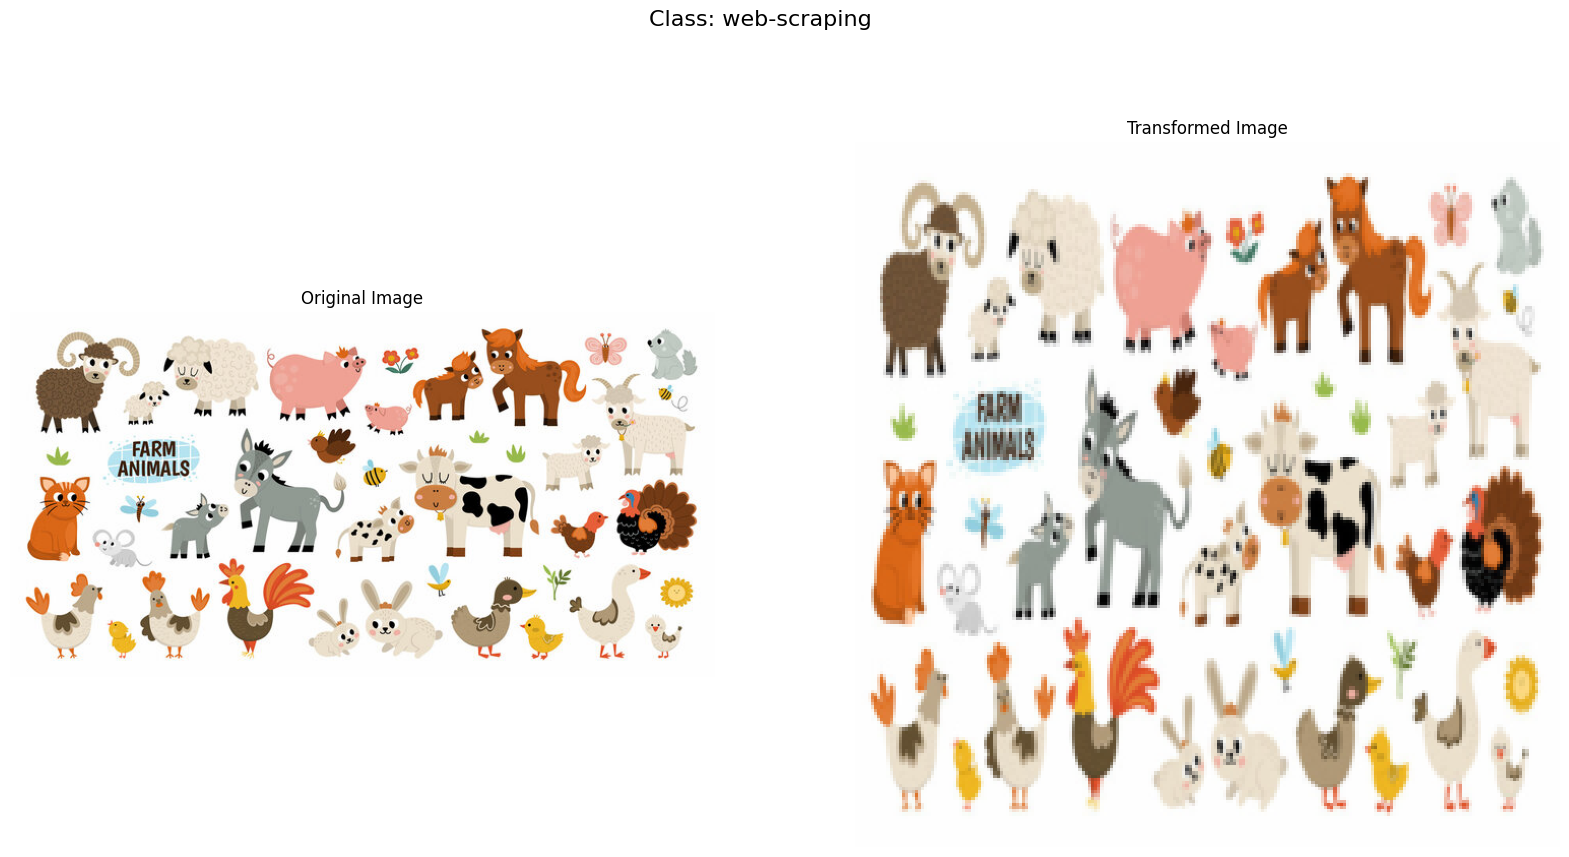

In [74]:
def plot_transformed_images(image_path, transform, n):
    image_path_list = list(image_path.glob('*/*png'))
    rand_image_paths = random.sample(image_path_list, n)
    for rand_image_path in rand_image_paths:
        with Image.open(rand_image_path) as f:
            fig, ax = plt.subplots(1, 2, figsize=(20, 10))
            ax[0].imshow(f)
            ax[0].set_title("Original Image")
            ax[0].axis(False)

            transformed_img = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_img)
            ax[1].set_title("Transformed Image")
            ax[1].axis(False)

            fig.suptitle(f"Class: {rand_image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path=train_dir, transform=data_transform, n=5)

In [75]:
model_names = [name for name, obj in models.__dict__.items() 
               if isinstance(obj, types.FunctionType) or isinstance(obj, types.BuiltinFunctionType)]

print("Available models in torchvision.models:")
for name in model_names:
    print(name)

Available models in torchvision.models:
alexnet
convnext_tiny
convnext_small
convnext_base
convnext_large
densenet121
densenet161
densenet169
densenet201
efficientnet_b0
efficientnet_b1
efficientnet_b2
efficientnet_b3
efficientnet_b4
efficientnet_b5
efficientnet_b6
efficientnet_b7
efficientnet_v2_s
efficientnet_v2_m
efficientnet_v2_l
googlenet
inception_v3
mnasnet0_5
mnasnet0_75
mnasnet1_0
mnasnet1_3
mobilenet_v2
mobilenet_v3_large
mobilenet_v3_small
regnet_y_400mf
regnet_y_800mf
regnet_y_1_6gf
regnet_y_3_2gf
regnet_y_8gf
regnet_y_16gf
regnet_y_32gf
regnet_y_128gf
regnet_x_400mf
regnet_x_800mf
regnet_x_1_6gf
regnet_x_3_2gf
regnet_x_8gf
regnet_x_16gf
regnet_x_32gf
resnet18
resnet34
resnet50
resnet101
resnet152
resnext50_32x4d
resnext101_32x8d
resnext101_64x4d
wide_resnet50_2
wide_resnet101_2
shufflenet_v2_x0_5
shufflenet_v2_x1_0
shufflenet_v2_x1_5
shufflenet_v2_x2_0
squeezenet1_0
squeezenet1_1
vgg11
vgg11_bn
vgg13
vgg13_bn
vgg16
vgg16_bn
vgg19
vgg19_bn
vit_b_16
vit_b_32
vit_l_16
vit_l_3

In [76]:
model = models.resnet152(pretrained=True)
for params in model.parameters():
    params.requires_grad = False
nr_filters = model.fc.in_features
model.fc = torch.nn.Linear(nr_filters, 2)
model = model.to(device)

/home/jhajduk/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jhajduk/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [77]:
loss_fn = torch.nn.CrossEntropyLoss()
LEARNING_RATE = 0.001
EPOCHS = 50
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [78]:
def train_step(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: torch.nn.modules.loss, optimizer: torch.optim.Optimizer, device: str = device):
    model.train()
    running_loss = 0.0
    correct_preds = 0
    total_samples = 0
    for i, (inputs, targets) in enumerate(dataloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == targets).sum().item()
        total_samples += targets.size(0)
    train_loss = running_loss / len(dataloader)
    train_acc = correct_preds / total_samples
    return train_loss, train_acc

In [79]:
def test_step(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: torch.nn.modules.loss, device: str = device):
    model.eval()
    running_loss = 0.0
    correct_preds = 0
    total_samples = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(dataloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_preds += (predicted == targets).sum().item()
            total_samples += targets.size(0)
    test_loss = running_loss / len(dataloader)
    test_acc = correct_preds / total_samples
    return test_loss, test_acc

In [80]:
def val_step(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: torch.nn.modules.loss, device: str = device):
    model.eval()
    running_loss = 0.0
    correct_preds = 0
    total_samples = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(dataloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_preds += (predicted == targets).sum().item()
            total_samples += targets.size(0)
    val_loss = running_loss / len(dataloader)
    val_acc = correct_preds / total_samples
    return val_loss, val_acc

In [81]:
def trainer_model(model: torch.nn.Module,
            train_dataloader: torch.utils.data.DataLoader,
            test_dataloader: torch.utils.data.DataLoader,
            val_dataloader: torch.utils.data.DataLoader,
            loss_fn: torch.nn.Module,
            optimizer: torch.optim.Optimizer,
            epochs: int,
            device=device):
    
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": [],
               "val_loss": [],
               "val_acc": []}
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model, dataloader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, device=device)
        test_loss, test_acc = test_step(model=model, dataloader=test_dataloader, loss_fn=loss_fn, device=device)
        val_loss, val_acc = val_step(model=model, dataloader=val_dataloader, loss_fn=loss_fn, device=device)
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.4f} | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f} | | Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_acc:.4f}")
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        results["val_loss"].append(val_loss)
        results["val_acc"].append(val_acc)
    return results
    

In [82]:
results = trainer_model(model=model,
                train_dataloader=train_data_loader,
                test_dataloader=test_data_loader,
                val_dataloader=val_data_loader,
                loss_fn=loss_fn,
                optimizer=optimizer,
                epochs=EPOCHS,
                device=device)

  0%|          | 0/50 [00:00<?, ?it/s]/home/jhajduk/.local/lib/python3.10/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/jhajduk/.local/lib/python3.10/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
  2%|▏         | 1/50 [00:10<08:44, 10.70s/it]

Epoch: 0 | Train Loss: 0.6480 | Train Accuracy: 0.6250 | Test Loss: 0.5720 | Test Accuracy: 0.7240 | | Validation Loss: 0.5558 | Validation Accuracy: 0.7292


  4%|▍         | 2/50 [00:17<06:47,  8.48s/it]

Epoch: 1 | Train Loss: 0.5241 | Train Accuracy: 0.7634 | Test Loss: 0.5338 | Test Accuracy: 0.7292 | | Validation Loss: 0.4751 | Validation Accuracy: 0.7708


  6%|▌         | 3/50 [00:24<06:00,  7.68s/it]

Epoch: 2 | Train Loss: 0.5558 | Train Accuracy: 0.7262 | Test Loss: 0.5644 | Test Accuracy: 0.6979 | | Validation Loss: 0.4713 | Validation Accuracy: 0.7812


  8%|▊         | 4/50 [00:31<05:45,  7.51s/it]

Epoch: 3 | Train Loss: 0.4852 | Train Accuracy: 0.7545 | Test Loss: 0.5253 | Test Accuracy: 0.7604 | | Validation Loss: 0.4415 | Validation Accuracy: 0.7708


 10%|█         | 5/50 [00:38<05:23,  7.18s/it]

Epoch: 4 | Train Loss: 0.4214 | Train Accuracy: 0.8155 | Test Loss: 0.5233 | Test Accuracy: 0.7604 | | Validation Loss: 0.4352 | Validation Accuracy: 0.7604


 12%|█▏        | 6/50 [00:46<05:27,  7.44s/it]

Epoch: 5 | Train Loss: 0.4002 | Train Accuracy: 0.8333 | Test Loss: 0.5266 | Test Accuracy: 0.7604 | | Validation Loss: 0.4220 | Validation Accuracy: 0.8021


 14%|█▍        | 7/50 [00:54<05:30,  7.69s/it]

Epoch: 6 | Train Loss: 0.3735 | Train Accuracy: 0.8512 | Test Loss: 0.5182 | Test Accuracy: 0.7604 | | Validation Loss: 0.4233 | Validation Accuracy: 0.8021


 16%|█▌        | 8/50 [01:01<05:09,  7.36s/it]

Epoch: 7 | Train Loss: 0.3753 | Train Accuracy: 0.8289 | Test Loss: 0.5490 | Test Accuracy: 0.7604 | | Validation Loss: 0.4398 | Validation Accuracy: 0.7917


 18%|█▊        | 9/50 [01:09<05:11,  7.59s/it]

Epoch: 8 | Train Loss: 0.3781 | Train Accuracy: 0.8408 | Test Loss: 0.5193 | Test Accuracy: 0.7708 | | Validation Loss: 0.4217 | Validation Accuracy: 0.8125


 20%|██        | 10/50 [01:15<04:50,  7.26s/it]

Epoch: 9 | Train Loss: 0.3574 | Train Accuracy: 0.8467 | Test Loss: 0.5190 | Test Accuracy: 0.7760 | | Validation Loss: 0.4222 | Validation Accuracy: 0.8021


 22%|██▏       | 11/50 [01:23<04:48,  7.40s/it]

Epoch: 10 | Train Loss: 0.3481 | Train Accuracy: 0.8586 | Test Loss: 0.5385 | Test Accuracy: 0.7708 | | Validation Loss: 0.4278 | Validation Accuracy: 0.8021


 24%|██▍       | 12/50 [01:30<04:39,  7.35s/it]

Epoch: 11 | Train Loss: 0.3581 | Train Accuracy: 0.8393 | Test Loss: 0.5213 | Test Accuracy: 0.7656 | | Validation Loss: 0.4195 | Validation Accuracy: 0.8125


 26%|██▌       | 13/50 [01:39<04:46,  7.74s/it]

Epoch: 12 | Train Loss: 0.3531 | Train Accuracy: 0.8289 | Test Loss: 0.5227 | Test Accuracy: 0.7656 | | Validation Loss: 0.4278 | Validation Accuracy: 0.8125


 28%|██▊       | 14/50 [01:46<04:32,  7.57s/it]

Epoch: 13 | Train Loss: 0.3130 | Train Accuracy: 0.8914 | Test Loss: 0.5341 | Test Accuracy: 0.7604 | | Validation Loss: 0.4286 | Validation Accuracy: 0.7917


 30%|███       | 15/50 [01:53<04:18,  7.38s/it]

Epoch: 14 | Train Loss: 0.3210 | Train Accuracy: 0.8661 | Test Loss: 0.5293 | Test Accuracy: 0.7500 | | Validation Loss: 0.4203 | Validation Accuracy: 0.8229


 32%|███▏      | 16/50 [02:00<04:06,  7.25s/it]

Epoch: 15 | Train Loss: 0.3303 | Train Accuracy: 0.8661 | Test Loss: 0.7485 | Test Accuracy: 0.6667 | | Validation Loss: 0.6213 | Validation Accuracy: 0.7396


 34%|███▍      | 17/50 [02:07<04:01,  7.32s/it]

Epoch: 16 | Train Loss: 0.3793 | Train Accuracy: 0.8318 | Test Loss: 0.5381 | Test Accuracy: 0.7344 | | Validation Loss: 0.4454 | Validation Accuracy: 0.8229


 36%|███▌      | 18/50 [02:14<03:50,  7.19s/it]

Epoch: 17 | Train Loss: 0.3153 | Train Accuracy: 0.8750 | Test Loss: 0.5461 | Test Accuracy: 0.7760 | | Validation Loss: 0.4445 | Validation Accuracy: 0.7812


 38%|███▊      | 19/50 [02:21<03:40,  7.11s/it]

Epoch: 18 | Train Loss: 0.3036 | Train Accuracy: 0.8720 | Test Loss: 0.5432 | Test Accuracy: 0.7604 | | Validation Loss: 0.4352 | Validation Accuracy: 0.7917


 40%|████      | 20/50 [02:28<03:30,  7.01s/it]

Epoch: 19 | Train Loss: 0.3730 | Train Accuracy: 0.8274 | Test Loss: 0.6418 | Test Accuracy: 0.7031 | | Validation Loss: 0.5601 | Validation Accuracy: 0.7188


 42%|████▏     | 21/50 [02:35<03:25,  7.10s/it]

Epoch: 20 | Train Loss: 0.3115 | Train Accuracy: 0.8616 | Test Loss: 0.5605 | Test Accuracy: 0.7812 | | Validation Loss: 0.4418 | Validation Accuracy: 0.7917


 44%|████▍     | 22/50 [02:42<03:18,  7.09s/it]

Epoch: 21 | Train Loss: 0.3199 | Train Accuracy: 0.8646 | Test Loss: 0.5560 | Test Accuracy: 0.7500 | | Validation Loss: 0.4443 | Validation Accuracy: 0.8125


 46%|████▌     | 23/50 [02:50<03:18,  7.34s/it]

Epoch: 22 | Train Loss: 0.3231 | Train Accuracy: 0.8527 | Test Loss: 0.5534 | Test Accuracy: 0.7552 | | Validation Loss: 0.4362 | Validation Accuracy: 0.7917


 48%|████▊     | 24/50 [02:58<03:14,  7.48s/it]

Epoch: 23 | Train Loss: 0.3015 | Train Accuracy: 0.8705 | Test Loss: 0.5454 | Test Accuracy: 0.7656 | | Validation Loss: 0.4373 | Validation Accuracy: 0.8021


 50%|█████     | 25/50 [03:04<02:59,  7.20s/it]

Epoch: 24 | Train Loss: 0.2909 | Train Accuracy: 0.8869 | Test Loss: 0.5447 | Test Accuracy: 0.7552 | | Validation Loss: 0.4327 | Validation Accuracy: 0.8021


 52%|█████▏    | 26/50 [03:11<02:49,  7.06s/it]

Epoch: 25 | Train Loss: 0.3047 | Train Accuracy: 0.8750 | Test Loss: 0.6022 | Test Accuracy: 0.7812 | | Validation Loss: 0.5001 | Validation Accuracy: 0.7917


 54%|█████▍    | 27/50 [03:19<02:44,  7.15s/it]

Epoch: 26 | Train Loss: 0.3071 | Train Accuracy: 0.8661 | Test Loss: 0.5454 | Test Accuracy: 0.7448 | | Validation Loss: 0.4513 | Validation Accuracy: 0.8021


 56%|█████▌    | 28/50 [03:25<02:33,  6.99s/it]

Epoch: 27 | Train Loss: 0.2634 | Train Accuracy: 0.8929 | Test Loss: 0.5983 | Test Accuracy: 0.7812 | | Validation Loss: 0.4962 | Validation Accuracy: 0.7917


 58%|█████▊    | 29/50 [03:32<02:28,  7.06s/it]

Epoch: 28 | Train Loss: 0.2785 | Train Accuracy: 0.9018 | Test Loss: 0.5386 | Test Accuracy: 0.7552 | | Validation Loss: 0.4519 | Validation Accuracy: 0.8021


 60%|██████    | 30/50 [03:39<02:20,  7.02s/it]

Epoch: 29 | Train Loss: 0.2584 | Train Accuracy: 0.8914 | Test Loss: 0.5465 | Test Accuracy: 0.7552 | | Validation Loss: 0.4476 | Validation Accuracy: 0.7812


 62%|██████▏   | 31/50 [03:46<02:12,  6.96s/it]

Epoch: 30 | Train Loss: 0.2692 | Train Accuracy: 0.9003 | Test Loss: 0.5447 | Test Accuracy: 0.7500 | | Validation Loss: 0.4481 | Validation Accuracy: 0.7917


 64%|██████▍   | 32/50 [03:53<02:05,  6.99s/it]

Epoch: 31 | Train Loss: 0.2672 | Train Accuracy: 0.9003 | Test Loss: 0.5753 | Test Accuracy: 0.7604 | | Validation Loss: 0.4963 | Validation Accuracy: 0.7812


 66%|██████▌   | 33/50 [04:00<01:58,  6.98s/it]

Epoch: 32 | Train Loss: 0.2396 | Train Accuracy: 0.9167 | Test Loss: 0.5469 | Test Accuracy: 0.7656 | | Validation Loss: 0.4543 | Validation Accuracy: 0.7812


 68%|██████▊   | 34/50 [04:08<01:54,  7.17s/it]

Epoch: 33 | Train Loss: 0.2776 | Train Accuracy: 0.8943 | Test Loss: 0.5570 | Test Accuracy: 0.7656 | | Validation Loss: 0.4615 | Validation Accuracy: 0.7708


 70%|███████   | 35/50 [04:15<01:45,  7.06s/it]

Epoch: 34 | Train Loss: 0.2610 | Train Accuracy: 0.8973 | Test Loss: 0.5630 | Test Accuracy: 0.7760 | | Validation Loss: 0.4699 | Validation Accuracy: 0.7917


 72%|███████▏  | 36/50 [04:22<01:38,  7.05s/it]

Epoch: 35 | Train Loss: 0.2444 | Train Accuracy: 0.9062 | Test Loss: 0.5925 | Test Accuracy: 0.7760 | | Validation Loss: 0.5026 | Validation Accuracy: 0.7812


 74%|███████▍  | 37/50 [04:29<01:31,  7.02s/it]

Epoch: 36 | Train Loss: 0.2517 | Train Accuracy: 0.9077 | Test Loss: 0.5654 | Test Accuracy: 0.7812 | | Validation Loss: 0.4695 | Validation Accuracy: 0.7917


 76%|███████▌  | 38/50 [04:36<01:24,  7.06s/it]

Epoch: 37 | Train Loss: 0.2463 | Train Accuracy: 0.9122 | Test Loss: 0.5510 | Test Accuracy: 0.7604 | | Validation Loss: 0.4582 | Validation Accuracy: 0.8021


 78%|███████▊  | 39/50 [04:43<01:18,  7.15s/it]

Epoch: 38 | Train Loss: 0.3196 | Train Accuracy: 0.8631 | Test Loss: 0.7166 | Test Accuracy: 0.7552 | | Validation Loss: 0.6160 | Validation Accuracy: 0.7708


 80%|████████  | 40/50 [04:50<01:12,  7.20s/it]

Epoch: 39 | Train Loss: 0.2995 | Train Accuracy: 0.8705 | Test Loss: 0.6025 | Test Accuracy: 0.7448 | | Validation Loss: 0.5325 | Validation Accuracy: 0.7708


 82%|████████▏ | 41/50 [04:58<01:04,  7.21s/it]

Epoch: 40 | Train Loss: 0.2451 | Train Accuracy: 0.8958 | Test Loss: 0.5811 | Test Accuracy: 0.7604 | | Validation Loss: 0.5101 | Validation Accuracy: 0.7812


 84%|████████▍ | 42/50 [05:05<00:58,  7.32s/it]

Epoch: 41 | Train Loss: 0.2690 | Train Accuracy: 0.9048 | Test Loss: 0.5744 | Test Accuracy: 0.7917 | | Validation Loss: 0.4846 | Validation Accuracy: 0.7917


 86%|████████▌ | 43/50 [05:12<00:50,  7.27s/it]

Epoch: 42 | Train Loss: 0.2453 | Train Accuracy: 0.9107 | Test Loss: 0.5555 | Test Accuracy: 0.7604 | | Validation Loss: 0.4646 | Validation Accuracy: 0.8021


 88%|████████▊ | 44/50 [05:19<00:42,  7.16s/it]

Epoch: 43 | Train Loss: 0.2384 | Train Accuracy: 0.9003 | Test Loss: 0.5661 | Test Accuracy: 0.7760 | | Validation Loss: 0.4797 | Validation Accuracy: 0.7917


 90%|█████████ | 45/50 [05:27<00:36,  7.25s/it]

Epoch: 44 | Train Loss: 0.2447 | Train Accuracy: 0.9062 | Test Loss: 0.6206 | Test Accuracy: 0.7760 | | Validation Loss: 0.5274 | Validation Accuracy: 0.7917


 92%|█████████▏| 46/50 [05:35<00:29,  7.41s/it]

Epoch: 45 | Train Loss: 0.2556 | Train Accuracy: 0.8943 | Test Loss: 0.5730 | Test Accuracy: 0.7552 | | Validation Loss: 0.5012 | Validation Accuracy: 0.7917


 94%|█████████▍| 47/50 [05:42<00:21,  7.32s/it]

Epoch: 46 | Train Loss: 0.2327 | Train Accuracy: 0.9077 | Test Loss: 0.5568 | Test Accuracy: 0.7656 | | Validation Loss: 0.4785 | Validation Accuracy: 0.7812


 96%|█████████▌| 48/50 [05:49<00:14,  7.36s/it]

Epoch: 47 | Train Loss: 0.2104 | Train Accuracy: 0.9301 | Test Loss: 0.5587 | Test Accuracy: 0.7604 | | Validation Loss: 0.4745 | Validation Accuracy: 0.7812


 98%|█████████▊| 49/50 [05:56<00:07,  7.32s/it]

Epoch: 48 | Train Loss: 0.2424 | Train Accuracy: 0.8929 | Test Loss: 0.5549 | Test Accuracy: 0.7500 | | Validation Loss: 0.4866 | Validation Accuracy: 0.7708


100%|██████████| 50/50 [06:03<00:00,  7.28s/it]

Epoch: 49 | Train Loss: 0.2385 | Train Accuracy: 0.9062 | Test Loss: 0.5654 | Test Accuracy: 0.7604 | | Validation Loss: 0.4882 | Validation Accuracy: 0.7917


In [83]:
pickle.dump(model, open('model.pkl', 'wb'))

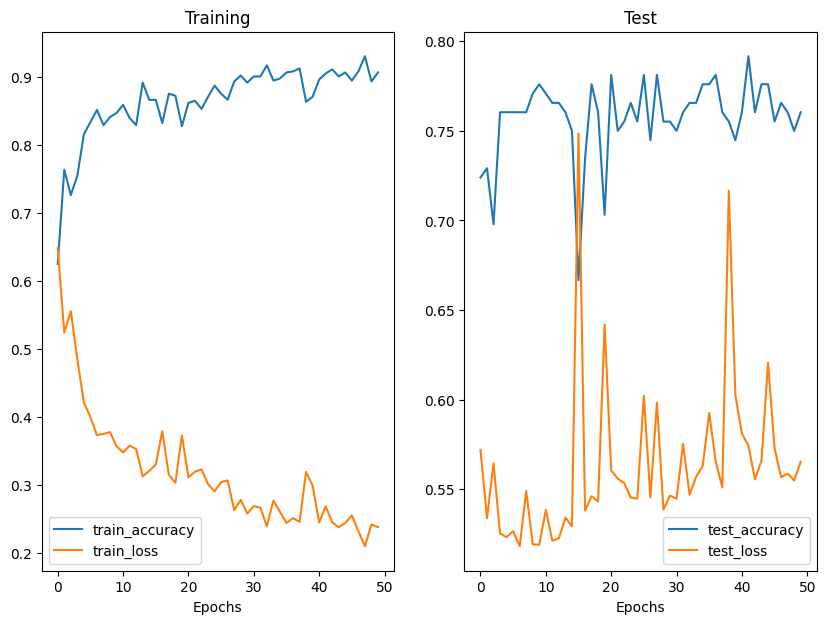

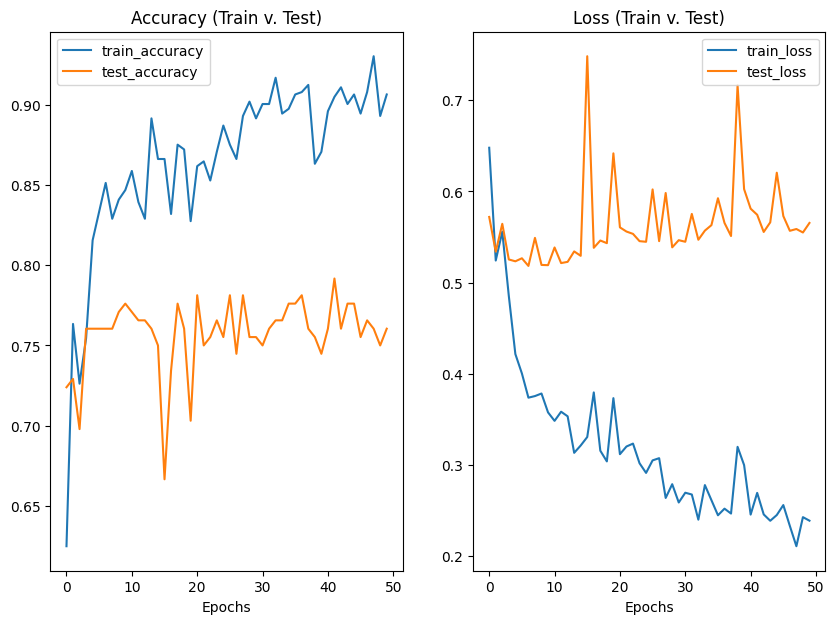

In [84]:
def plot_results_dict(results: dict[str, list[float]]):
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(10,7))
    plt.subplot(1,2,1)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, loss, label="train_loss")
    plt.title("Training")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Test")
    plt.xlabel("Epochs")
    plt.legend()

    plt.figure(figsize=(10,7))
    plt.subplot(1,2,1)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy (Train v. Test)")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss (Train v. Test)")
    plt.xlabel("Epochs")
    plt.legend()

plot_results_dict(results)

In [85]:
custom_test_image_path = Path("../../datasets/art/train/ai-generated/_a_peaceful_countryside_Beaches_with_a__2edf54e5-d4e4-4507-abde-4f81b9754b54.png")
custom_image = torchvision.io.read_image(str(custom_test_image_path)).type(torch.float32) / 255
custom_image

tensor([[[0.4000, 0.3922, 0.3922,  ..., 0.9961, 0.9961, 1.0000],
         [0.4000, 0.3922, 0.3961,  ..., 0.9882, 0.9922, 1.0000],
         [0.3961, 0.3922, 0.3961,  ..., 0.9922, 0.9882, 1.0000],
         ...,
         [0.3725, 0.3608, 0.3647,  ..., 0.1059, 0.1059, 0.0980],
         [0.3647, 0.3569, 0.3608,  ..., 0.1059, 0.1098, 0.1059],
         [0.3647, 0.3725, 0.3686,  ..., 0.1059, 0.1020, 0.1059]],

        [[0.4431, 0.4549, 0.4588,  ..., 0.9137, 0.9098, 0.9137],
         [0.4549, 0.4588, 0.4588,  ..., 0.9059, 0.9059, 0.9059],
         [0.4549, 0.4588, 0.4588,  ..., 0.9059, 0.9059, 0.9098],
         ...,
         [0.4431, 0.4314, 0.4392,  ..., 0.2863, 0.2863, 0.2863],
         [0.4431, 0.4431, 0.4392,  ..., 0.2824, 0.2824, 0.2863],
         [0.4078, 0.4471, 0.4431,  ..., 0.2902, 0.2863, 0.2627]],

        [[0.3255, 0.3137, 0.3098,  ..., 0.7765, 0.7765, 0.7804],
         [0.3137, 0.3098, 0.3098,  ..., 0.7725, 0.7725, 0.7647],
         [0.3098, 0.3098, 0.3098,  ..., 0.7725, 0.7725, 0.

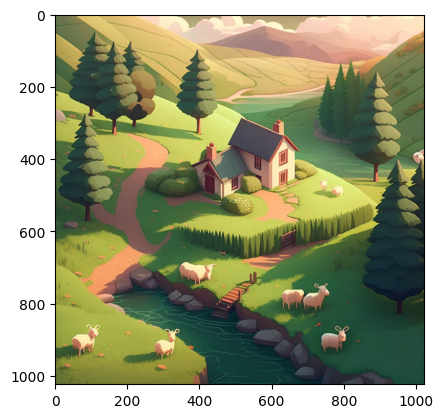

In [86]:
plt.imshow(custom_image.permute(1,2,0))

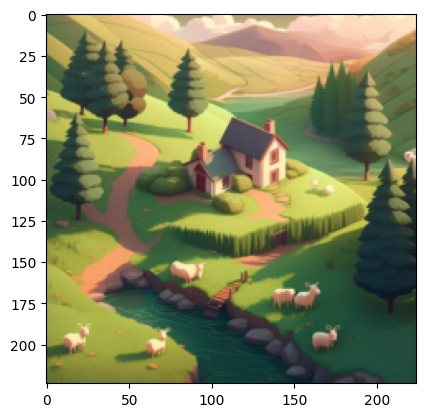

In [87]:
custom_image_transform = transforms.Compose([transforms.Resize(size=(224,224))
])
custom_image_transformed = custom_image_transform(custom_image)
plt.imshow(custom_image_transformed.permute(1,2,0))

In [88]:
model.eval()
with torch.inference_mode():
    custom_image_pred = model(custom_image_transformed.unsqueeze(0).to(device))

In [89]:
custom_image_pred

tensor([[ 2.4591, -3.0838]], device='cuda:0')

In [90]:
classes

['ai-generated', 'web-scraping']

### Load and Test Model on random images not included in training, test, or validation

In [ ]:
images_path = Path("./Test_Images/")
for img in images_path:
    img = torchvision.io.read_image(str(custom_test_image_path)).type(torch.float32) / 255
    transformed_image = custom_image_transform(img)
    plt.imshow(transformed_image)
